In this notebook we show plotting of some numerical sensor data

In [1]:
!pip show HASS-data-detective|grep Version

Version: 1.0


In [2]:
import pandas as pd
%matplotlib inline
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'
from detective.core import db_from_hass_config
db = db_from_hass_config()

Successfully connected to database sqlite:////config/home-assistant_v2.db
There are 13 entities with data


In [3]:
%%time
db.fetch_all_data()

Querying the database, this could take a while
master_df created successfully.
CPU times: user 4.68 s, sys: 310 ms, total: 4.99 s
Wall time: 5 s


In [4]:
db.entities['sensor']

['sensor.humidity',
 'sensor.mqtt_sensor',
 'sensor.particles_03um',
 'sensor.particles_05um',
 'sensor.particles_100um',
 'sensor.particles_10um',
 'sensor.particles_25um',
 'sensor.particles_50um',
 'sensor.pressure',
 'sensor.robins_iphone_battery_level',
 'sensor.robins_iphone_battery_state',
 'sensor.serial_sensor',
 'sensor.temperature',
 'sensor.yr_symbol']

In [5]:
from detective.core import NumericalSensors
numerical_sensors = NumericalSensors(db.master_df)

In [6]:
numerical_sensors.data.head()

entity,sensor.particles_03um,sensor.particles_05um,sensor.particles_100um,sensor.particles_10um,sensor.particles_25um,sensor.particles_50um,sensor.robins_iphone_battery_level,sensor.yr_symbol
last_changed,,,,,,,,
2018-11-09 07:33:10.525785,1608.0,443.0,0.0,59.0,1.0,0.0,100.0,4.0
2018-11-09 07:33:11.402998,1617.0,443.0,0.0,59.0,1.0,0.0,100.0,4.0
2018-11-09 07:33:11.404225,1617.0,453.0,0.0,59.0,1.0,0.0,100.0,4.0
2018-11-09 07:33:11.406182,1617.0,453.0,0.0,62.0,1.0,0.0,100.0,4.0
2018-11-09 07:33:12.291884,1623.0,453.0,0.0,62.0,1.0,0.0,100.0,4.0


In [7]:
numerical_sensors.entities

['sensor.robins_iphone_battery_level',
 'sensor.yr_symbol',
 'sensor.particles_50um',
 'sensor.particles_25um',
 'sensor.particles_10um',
 'sensor.particles_05um',
 'sensor.particles_03um',
 'sensor.particles_100um']

We can get the summary stats for a single sensor

In [8]:
numerical_sensors.data['sensor.particles_10um'].describe()

count    9007.000000
mean       60.481181
std        97.121697
min         0.000000
25%        13.000000
50%        36.000000
75%        57.000000
max      1102.000000
Name: sensor.particles_10um, dtype: float64

We have a helper function `correlations()` to calculate the correlation between sensors

In [9]:
numerical_sensors.correlations()[:3] # top 3 correlations

,value
sensor.particles_03um-sensor.particles_05um,0.994996
sensor.particles_05um-sensor.particles_10um,0.974156
sensor.particles_10um-sensor.particles_03um,0.964971


We use a convenience function to plot these sensors, but the function is a bit limited

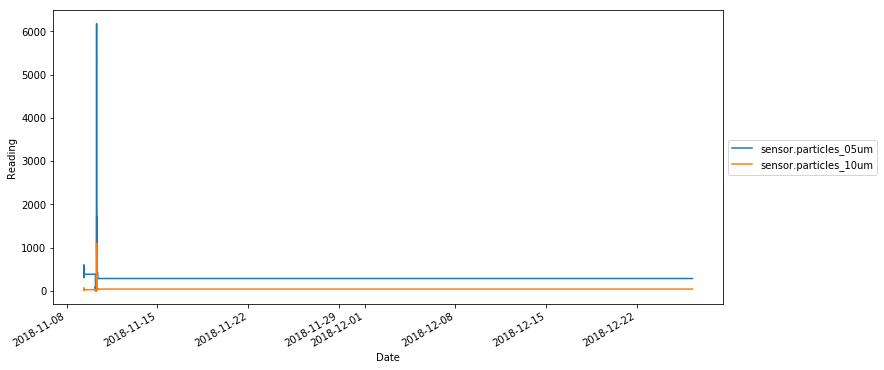

In [10]:
entities = ['sensor.particles_05um',
            'sensor.particles_10um']

numerical_sensors.plot(entities)

We can create the same plot directly

Text(0, 0.5, 'Reading')

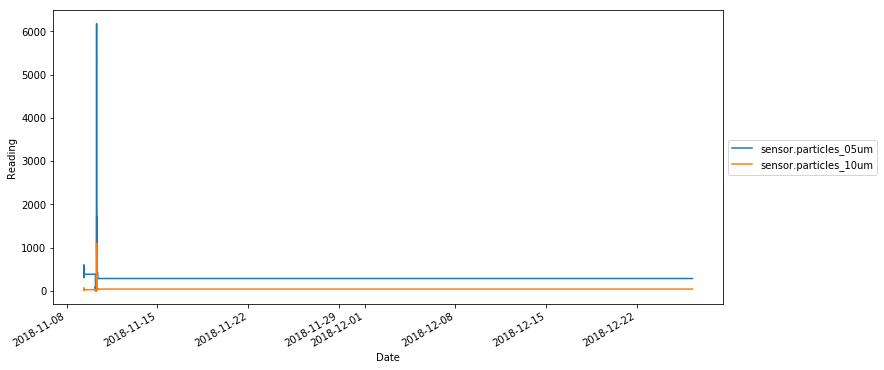

In [11]:
ax = numerical_sensors.data[entities].plot(figsize=[12, 6])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Date")
ax.set_ylabel("Reading")

We can filter the daterange of data shown using the `.loc` attribute of the dataframe

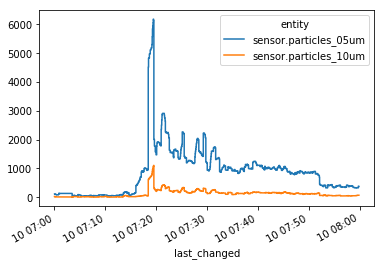

In [12]:
numerical_sensors.data[entities].loc['2018-11-10 07:00:00':'2018-11-10 8:00:00'].plot();

## Pandas-bokeh
We can use the lib [pandas-bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh) to plot with Bokeh

In [13]:
!pip install pandas-bokeh

In [14]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [15]:
numerical_sensors.data[entities].plot_bokeh(kind="line") 

Figure(id='1003', ...)